In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import time,datetime

In [13]:
# cj_price是长江电力日收盘价，cj_return是长江电力不考虑红利再投资的日回报率，index是中证500（000905）
df = pd.read_csv('merged.csv', header=0)
df.head()

,Date,AAA,AA1,AA,cj_price,cj_return,Index
0,2007-10-11,5.180,5.3090,5.4380,20.95,0.067788,5005.50
1,2007-10-12,5.220,5.3500,5.4800,20.14,-0.038663,4891.39
2,2007-10-15,5.245,5.3756,5.5062,22.15,0.099801,4890.60
3,2007-10-16,5.250,5.3807,5.5115,22.34,0.008578,4943.56
4,2007-10-17,5.280,5.4115,5.5429,21.50,-0.037601,4929.54


In [14]:
df.eval('new1 = AA1 - AAA',inplace = True)
df.eval('new2 = AA - AA1',inplace = True)
df.eval('new3 = AA - AAA',inplace = True)
df.head()

,Date,AAA,AA1,AA,cj_price,cj_return,Index,new1,new2,new3
0,2007-10-11,5.180,5.3090,5.4380,20.95,0.067788,5005.50,0.1290,0.1290,0.2580
1,2007-10-12,5.220,5.3500,5.4800,20.14,-0.038663,4891.39,0.1300,0.1300,0.2600
2,2007-10-15,5.245,5.3756,5.5062,22.15,0.099801,4890.60,0.1306,0.1306,0.2612
3,2007-10-16,5.250,5.3807,5.5115,22.34,0.008578,4943.56,0.1307,0.1308,0.2615
4,2007-10-17,5.280,5.4115,5.5429,21.50,-0.037601,4929.54,0.1315,0.1314,0.2629


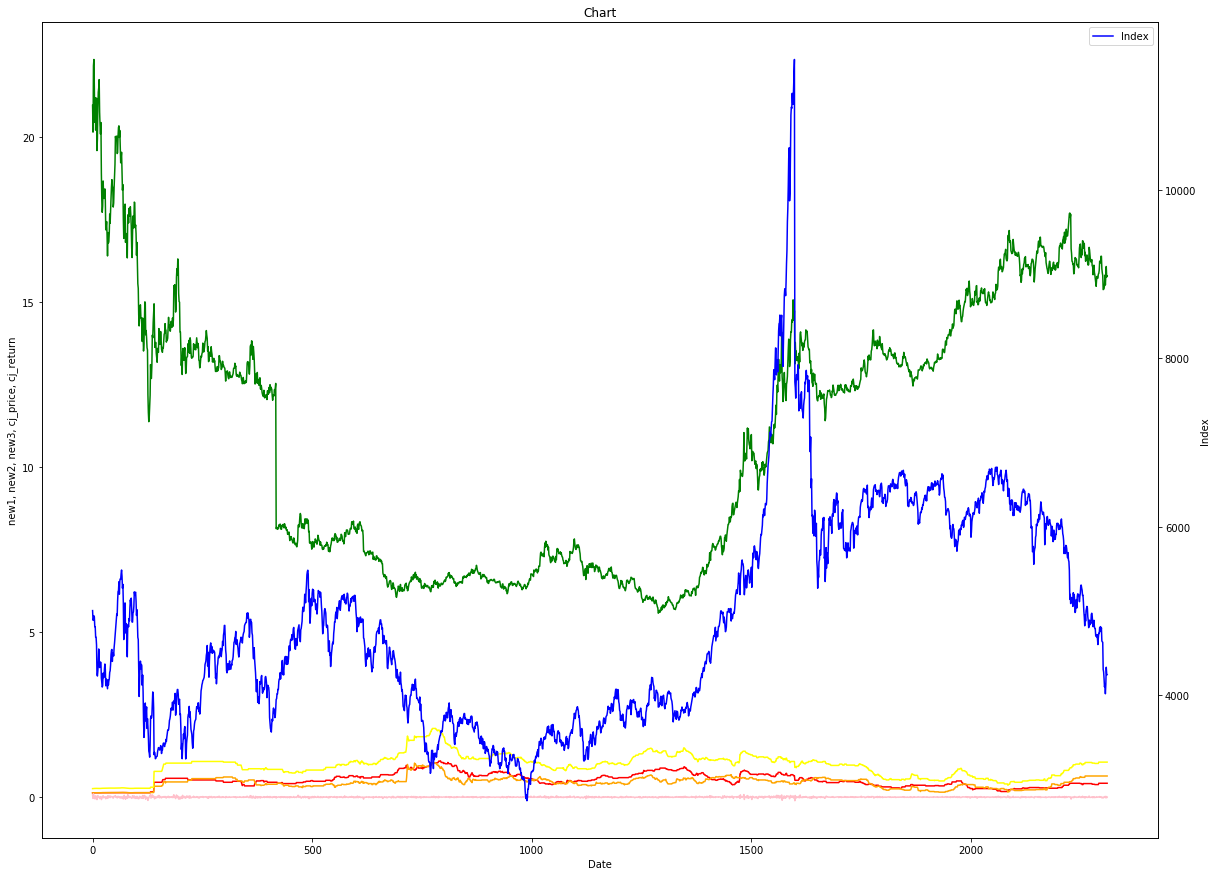

In [15]:
fig,left_axis=plt.subplots(figsize=(20,15))
right_axis = left_axis.twinx()
plt.title("Chart")
left_axis.set_xlabel('Date')
left_axis.set_ylabel('new1, new2, new3, cj_price, cj_return')
plt.ylabel('Index')
left_axis.plot(df.new1,color = 'red')
left_axis.plot(df.new2,color = 'orange')
left_axis.plot(df.new3,color = 'yellow')
right_axis.plot(df.Index,color = 'blue')
left_axis.plot(df.cj_price,color = 'green')
left_axis.plot(df.cj_return,color = 'pink')
plt.legend()

In [16]:
df2=df[['new1','new2','new3','Index','cj_price','cj_return']] 
print(df2.corr())

               new1      new2      new3     Index  cj_price  cj_return
new1       1.000000  0.725562  0.942289 -0.367836 -0.759388   0.017335
new2       0.725562  1.000000  0.914084 -0.341011 -0.494976   0.018265
new3       0.942289  0.914084  1.000000 -0.382670 -0.688315   0.019102
Index     -0.367836 -0.341011 -0.382670  1.000000  0.541471   0.047428
cj_price  -0.759388 -0.494976 -0.688315  0.541471  1.000000   0.016786
cj_return  0.017335  0.018265  0.019102  0.047428  0.016786   1.000000
